<a href="https://colab.research.google.com/github/mohammadumar146/Speech-Emotion-Recognition-/blob/main/CNN_Model_NEw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install librosa soundfile numpy sklearn pyaudio

  ERROR: Failed building wheel for pyaudio
  Running setup.py clean for pyaudio
Failed to build pyaudio
    Running setup.py install for pyaudio ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-qjrhra1c/pyaudio_d886b059e9be42c3aa4610adf481371c/setup.py'"'"'; __file__='"'"'/tmp/pip-install-qjrhra1c/pyaudio_d886b059e9be42c3aa4610adf481371c/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-la63sq1v/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/pyaudio Check the logs for full command output.


In [ ]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
               #X = sound_file.read()
        sample_rate=sound_file.samplerate
        X, sample_rate = librosa.load(file_name)
        #sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma1=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma1))
        if mel:
            mel1=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel1))
        return result

In [ ]:
#Emotions in the  dataset
emotions={
  '03':'03',
  '02':'02',
  '04':'04',
  '01':'01',
}
# - Emotions to observe
observed_emotions=['01', '02', '03', '04']

In [ ]:
# - Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("./drive/My Drive/data/Emotion_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[1]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
        feature = [int(x) for x in feature] 
       # emotion =[float(y) for y in emotion]
       # print(emotion)

    return train_test_split(np.asarray(x), np.asarray(y), test_size=test_size, random_state=15)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.23, random_state=42)
# - Split the dataset
x_train, x_test, y_train, y_test = load_data(test_size=0.25)

In [ ]:
# - Get the shape of the training and testing datasets
#print(y_test.shape[0])
print((x_train.shape[0], x_test.shape[0]))

(461, 154)


In [ ]:
X_train = np.array(x_train)
y_train = np.array(y_train).ravel()
X_test = np.array(x_test)
y_test = np.array(y_test).ravel()

In [ ]:
# One-Hot Encoding
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [ ]:
# To build Neural Network and Create desired Model
import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D #, AveragePooling1D
from keras.layers import Flatten, Dropout, Activation # Input, 
from keras.layers import Dense #, Embeddi
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(x_traincnn.shape[1],x_traincnn.shape[2])))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(y_train.shape[1]))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 180, 256)          1536      
_________________________________________________________________
activation (Activation)      (None, 180, 256)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 180, 128)          163968    
_________________________________________________________________
activation_1 (Activation)    (None, 180, 128)          0         
_________________________________________________________________
dropout (Dropout)            (None, 180, 128)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 22, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 22, 128)           8

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=500, validation_data=(x_testcnn, y_test))

Epoch 1/500
29/29 [==============================] - 21s 131ms/step - loss: 1.2422 - accuracy: 0.4415 - val_loss: 1.2292 - val_accuracy: 0.4870
Epoch 2/500
29/29 [==============================] - 3s 102ms/step - loss: 1.0895 - accuracy: 0.5891 - val_loss: 1.1781 - val_accuracy: 0.5455
Epoch 3/500
29/29 [==============================] - 3s 102ms/step - loss: 1.0632 - accuracy: 0.5967 - val_loss: 1.1103 - val_accuracy: 0.6494
Epoch 4/500
29/29 [==============================] - 3s 102ms/step - loss: 0.9858 - accuracy: 0.6681 - val_loss: 1.0760 - val_accuracy: 0.6299
Epoch 5/500
29/29 [==============================] - 3s 102ms/step - loss: 0.9602 - accuracy: 0.6738 - val_loss: 1.0326 - val_accuracy: 0.6688
Epoch 6/500
29/29 [==============================] - 3s 101ms/step - loss: 0.9533 - accuracy: 0.7194 - val_loss: 1.0082 - val_accuracy: 0.6818
Epoch 7/500
29/29 [==============================] - 3s 103ms/step - loss: 0.8567 - accuracy: 0.7292 - val_loss: 0.9641 - val_accuracy: 0.714

Populating the interactive namespace from numpy and matplotlib


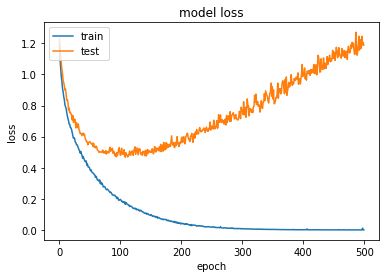

In [ ]:
# Enable plot in the notebook
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_name = 'umar.h5'
save_dir = os.path.join(os.getcwd(), 'Trained_Models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/Trained_Models/umar.h5 


In [ ]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("./Trained_Models/umar.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 90.91%


In [ ]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

5/5 [==============================] - 1s 48ms/step


In [ ]:
preds1=preds.argmax(axis=1)

In [ ]:
import pandas as pd
abc = preds1.astype(int).flatten()
predictions = (lb.inverse_transform((abc)))
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,03
1,04
2,02
3,04
4,04
5,03
6,03
7,04
8,01
9,03


In [ ]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [ ]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,03
1,04
2,04
3,04
4,04
5,03
6,04
7,02
8,01
9,03


In [ ]:
finaldf = actualdf.join(preddf)
finaldf[130:140]

,actualvalues,predictedvalues
130,02,02
131,02,02
132,01,01
133,02,02
134,02,02
135,02,02
136,04,04
137,01,01
138,02,02
139,02,02


In [ ]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
01,39
02,44
03,31
04,40


In [ ]:
score = model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 90.91%
